In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
results = pd.read_csv('data/academic_data.csv')

columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']

results.drop(columns, axis=1, inplace=True)

results.dropna(inplace=True)

results.info()

# save the cleaned data
results.to_csv('academic_data_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unit_code      43 non-null     object 
 1   unit_title     43 non-null     object 
 2   credit_points  43 non-null     float64
 3   mark           43 non-null     float64
 4   grade          43 non-null     object 
 5   degree_type    43 non-null     object 
 6   field          43 non-null     object 
 7   year           43 non-null     float64
 8   semester       43 non-null     float64
dtypes: float64(4), object(5)
memory usage: 3.4+ KB


In [10]:
results = results.astype({'credit_points': np.float16, 'mark': np.int16, 'year': np.int16, 'semester': np.int16})

In [11]:
# save the cleaned data

results.to_csv('academic_data_cleaned.csv', index=False)

In [12]:
results = pd.read_csv('academic_data_cleaned.csv')

# add a column for the degree_field if field == 'Information Technology' then degree_field = 'Data Analytics' else degree_field = 'Civil Engineering'

results['degree_field'] = results['field'].apply(lambda x: 'Data Analytics' if x == 'Information Technology' else 'Civil Engineering')

results.head()

,unit_code,unit_title,credit_points,mark,grade,degree_type,field,year,semester,degree_field
0,COS60004,Creating Web Applications,12.5,91,HD,Master,Information Technology,2022,1,Data Analytics
1,COS60008,Introduction to Data Science,12.5,90,HD,Master,Information Technology,2022,1,Data Analytics
2,COS60009,Data Management for the Big Data Age,12.5,78,D,Master,Information Technology,2022,1,Data Analytics
3,COS60010,Technology Enquiry Project,12.5,60,C,Master,Information Technology,2022,1,Data Analytics
4,COS60011,Technology Design Project,12.5,85,HD,Master,Information Technology,2022,2,Data Analytics


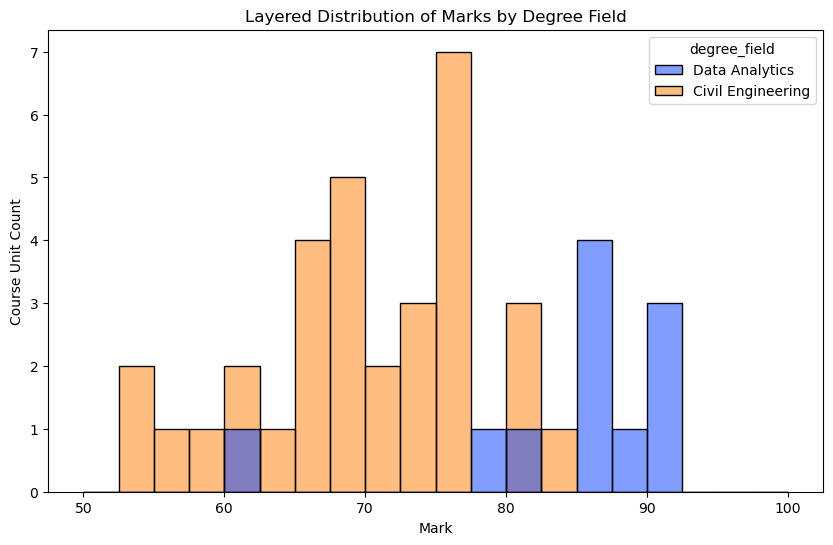

In [13]:
plt.figure(figsize=(10, 6))
hist = sns.histplot(data=results, 
             x="mark", 
             hue="degree_field", 
             multiple="layer", 
             bins=20, 
             binrange=(50, 100), 
             palette="bright")

plt.xlabel("Mark")
plt.ylabel("Course Unit Count")
plt.title("Layered Distribution of Marks by Degree Field")
plt.savefig('assets/histogram.png')
plt.show()

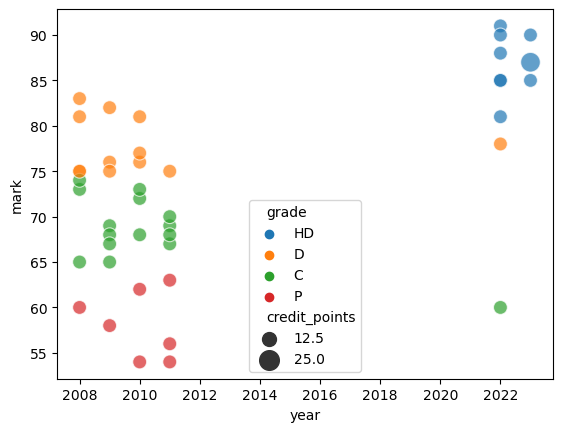

In [14]:
sns.scatterplot(data=results,
                x = "year",
                y = "mark",
                size="credit_points",
                hue="grade",
                alpha=0.7,
                sizes=(100, 200))
plt.show()